<b>GROUP:</b><br/>

1. Dan Lewis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import ticker as tck

## Loading the dataset

In [2]:
df = pd.read_csv(os.path.join("data", "Tetuan City power consumption.csv"))
df

DateTime  Temperature  Humidity  Wind Speed  \
0         1/1/2017 0:00        6.559      73.8       0.083   
1         1/1/2017 0:10        6.414      74.5       0.083   
2         1/1/2017 0:20        6.313      74.5       0.080   
3         1/1/2017 0:30        6.121      75.0       0.083   
4         1/1/2017 0:40        5.921      75.7       0.081   
...                 ...          ...       ...         ...   
52411  12/30/2017 23:10        7.010      72.4       0.080   
52412  12/30/2017 23:20        6.947      72.6       0.082   
52413  12/30/2017 23:30        6.900      72.8       0.086   
52414  12/30/2017 23:40        6.758      73.0       0.080   
52415  12/30/2017 23:50        6.580      74.1       0.081   

       general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
0                      0.051          0.119               34055.69620   
1                      0.070          0.085               29814.68354   
2                      0.062          0.100               29128.10127   
3                      0.091          0.096               28228.86076   
4                      0.048          0.085               27335.69620   
...                      ...            ...                       ...   
52411                  0.040          0.096               31160.45627   
52412                  0.051          0.093               30430.41825   
52413                  0.084          0.074               29590.87452   
52414                  0.066          0.089               28958.17490   
52415                  0.062          0.111               28349.80989   

       Zone 2  Power Consumption  Zone 3  Power Consumption  
0                    16128.87538                20240.96386  
1                    19375.07599                20131.08434  
2                    19006.68693                19668.43373  
3                    18361.09422                18899.27711  
4                    17872.34043                18442.40964  
...                          ...                        ...  
52411                26857.31820                14780.31212  
52412                26124.57809                14428.81152  
52413                25277.69254                13806.48259  
52414                24692.23688                13512.60504  
52415                24055.23167                13345.49820  

[52416 rows x 9 columns]

In [3]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

## Checking for missing values

In [4]:
df.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

## No missing values found

In [5]:
len(df.dropna())

52416

## Generate descriptive statistics.

In [6]:
df.describe()

Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.465892   
min         0.011000              13895.696200                8560.081466   
25%         0.122000              26310.668692               16980.766032   
50%         4.456000              32265.920340               20823.168405   
75%       101.000000              37309.018185               24713.717520   
max       936.000000              52204.395120               37408.860760   

       Zone 3  Power Consumption  
count               52416.000000  
mean                17835.406218  
std                  6622.165099  
min                  5935.174070  
25%                 13129.326630  
50%                 16415.117470  
75%                 21624.100420  
max                 47598.326360

## Loop to remove spaces between words in columns

In [7]:
l = []

for i in df.columns:
    s = str()
    for j in i:
        if j != " ":
            s += j
    l.append(s)
l

['DateTime',
 'Temperature',
 'Humidity',
 'WindSpeed',
 'generaldiffuseflows',
 'diffuseflows',
 'Zone1PowerConsumption',
 'Zone2PowerConsumption',
 'Zone3PowerConsumption']

In [8]:
df.columns = l

## The new columns

In [9]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'WindSpeed',
       'generaldiffuseflows', 'diffuseflows', 'Zone1PowerConsumption',
       'Zone2PowerConsumption', 'Zone3PowerConsumption'],
      dtype='object')

## Visualizing the correlation between columns in our dataset

<AxesSubplot:>

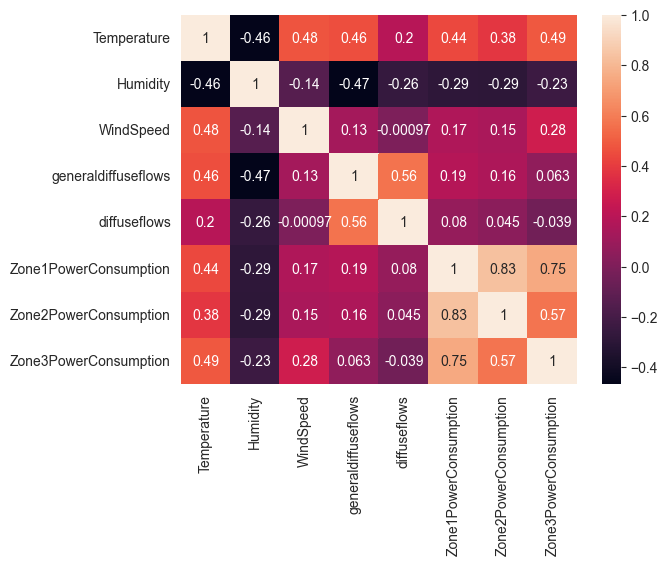

In [10]:
sns.heatmap(df.corr(), annot=True)

## Finding the data types of column data

In [11]:
df.dtypes

DateTime                  object
Temperature              float64
Humidity                 float64
WindSpeed                float64
generaldiffuseflows      float64
diffuseflows             float64
Zone1PowerConsumption    float64
Zone2PowerConsumption    float64
Zone3PowerConsumption    float64
dtype: object

## Drop duplicates

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
len(df)

52416

## Summary involving data types, columns and non-null values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               52416 non-null  object 
 1   Temperature            52416 non-null  float64
 2   Humidity               52416 non-null  float64
 3   WindSpeed              52416 non-null  float64
 4   generaldiffuseflows    52416 non-null  float64
 5   diffuseflows           52416 non-null  float64
 6   Zone1PowerConsumption  52416 non-null  float64
 7   Zone2PowerConsumption  52416 non-null  float64
 8   Zone3PowerConsumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 4.0+ MB


## Plot pairwise relationships in a dataset

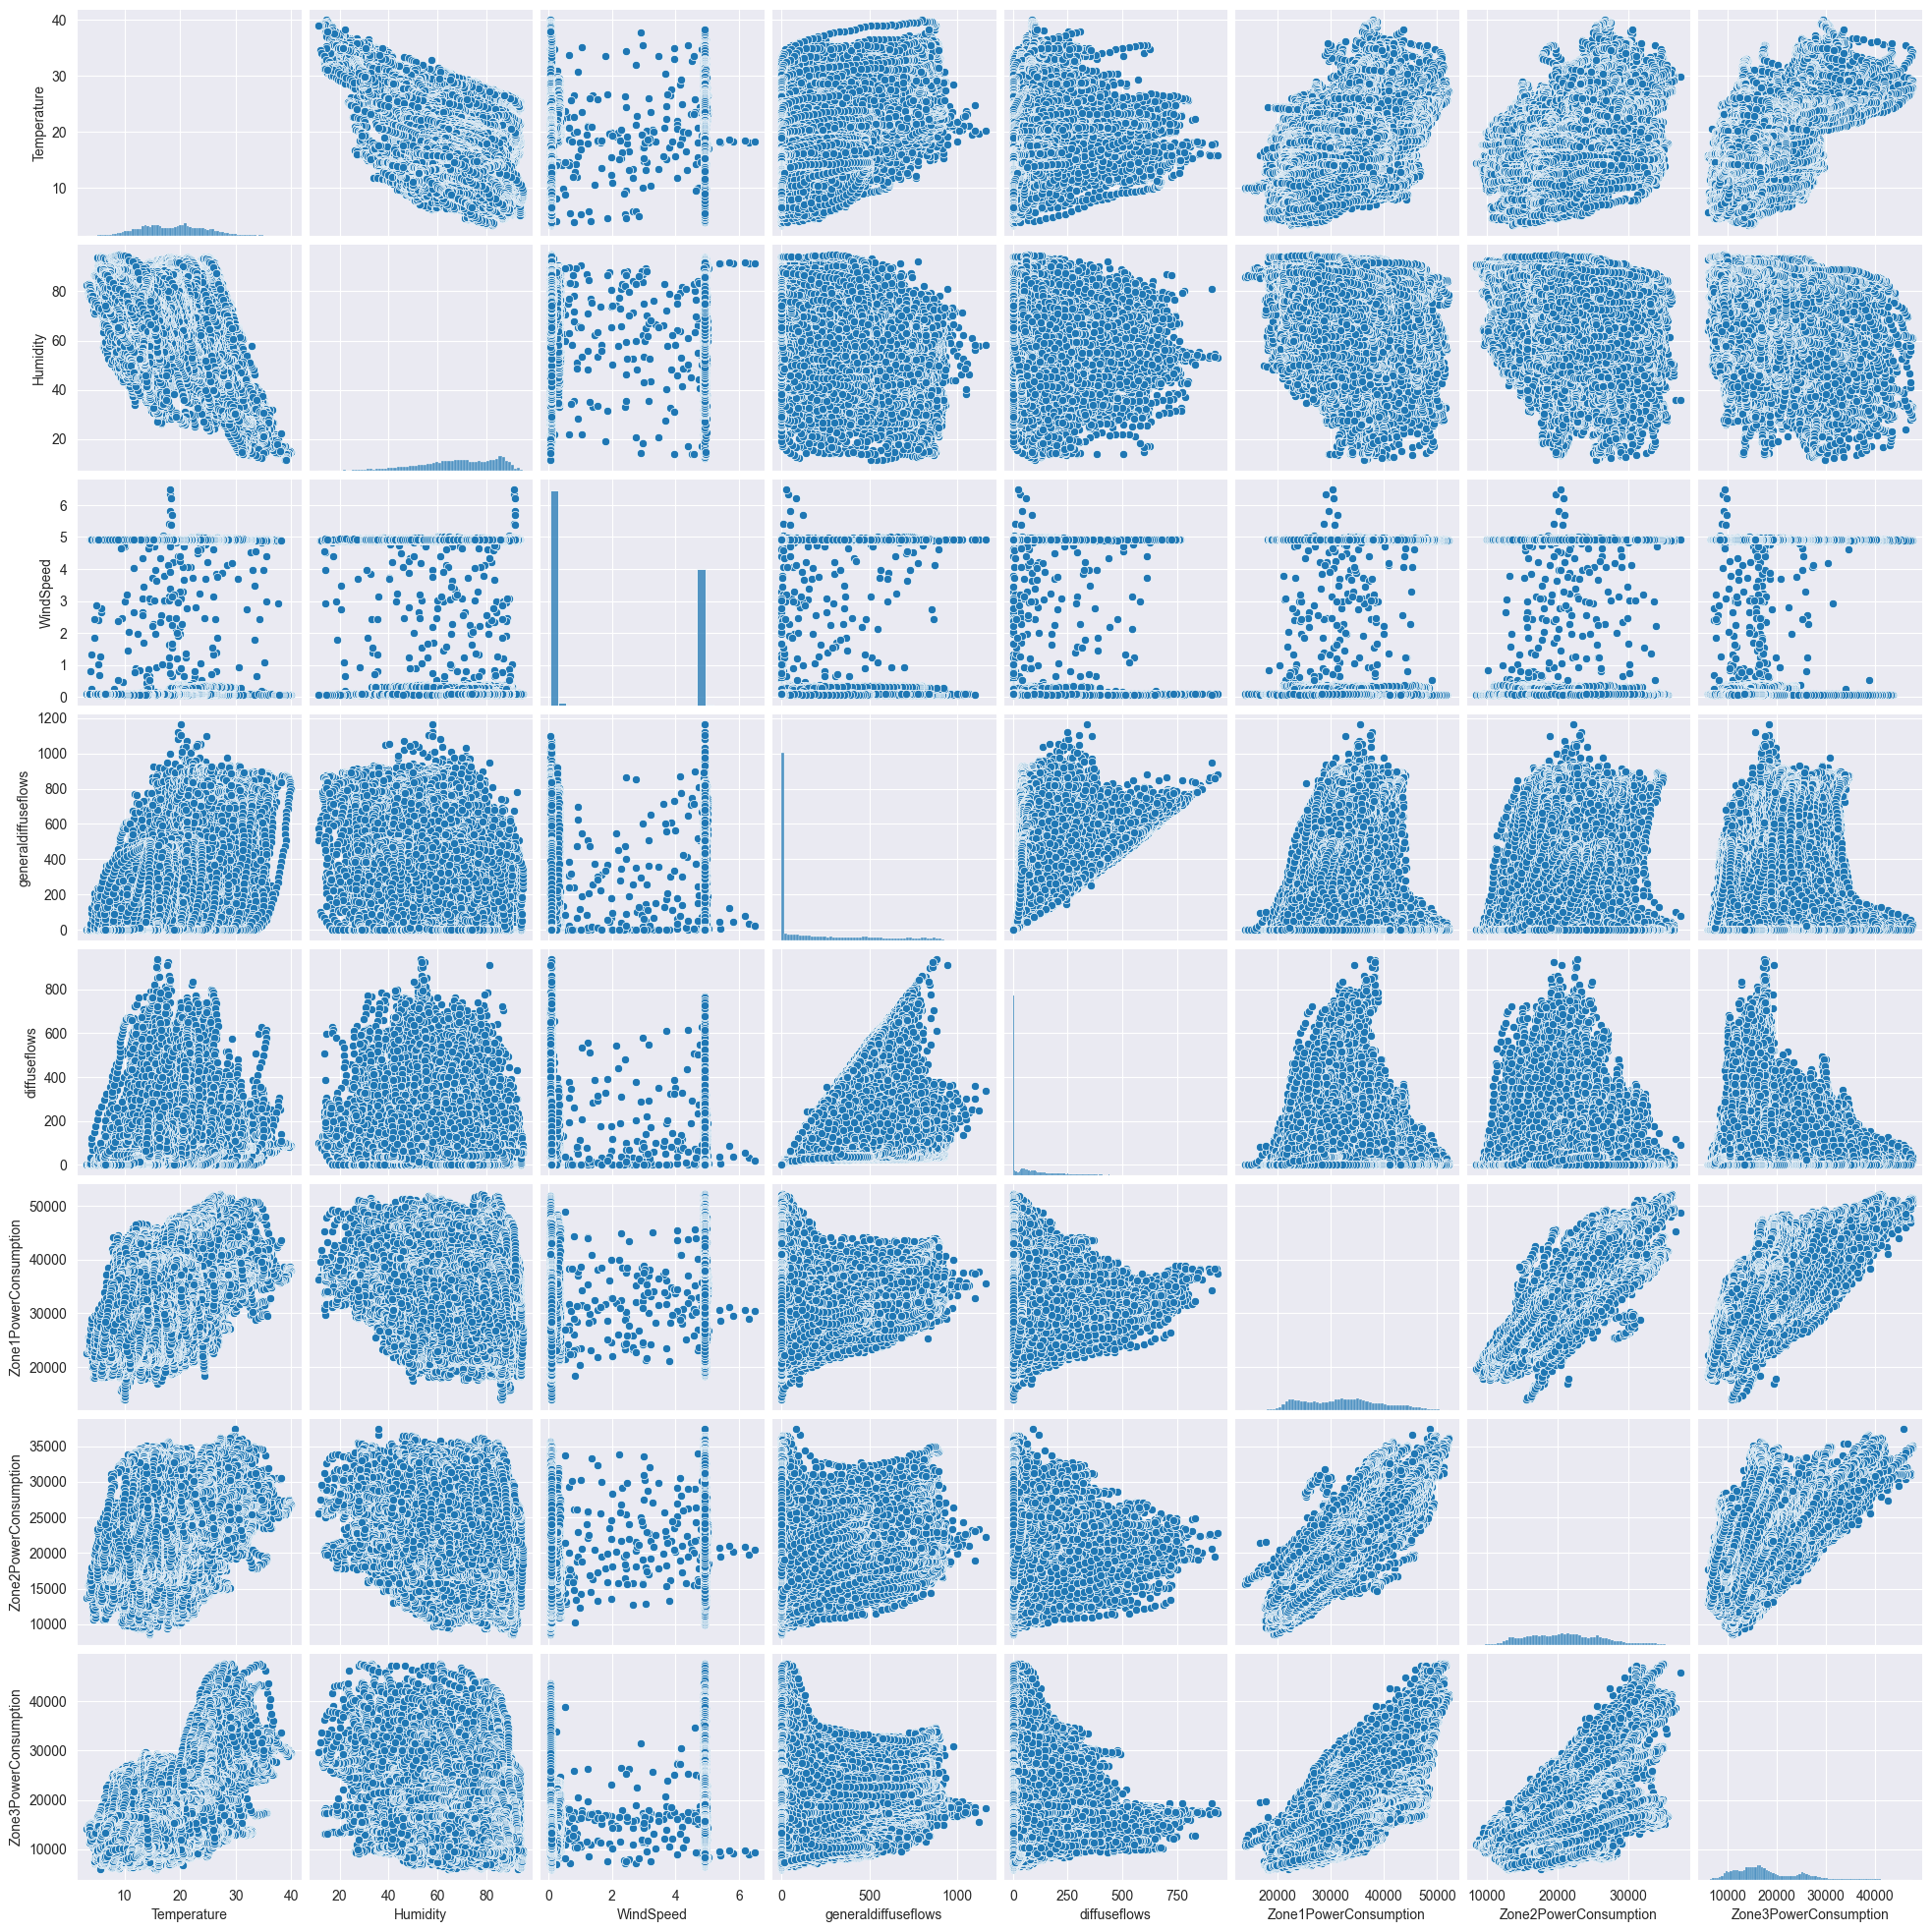

In [15]:
sns.pairplot(df)

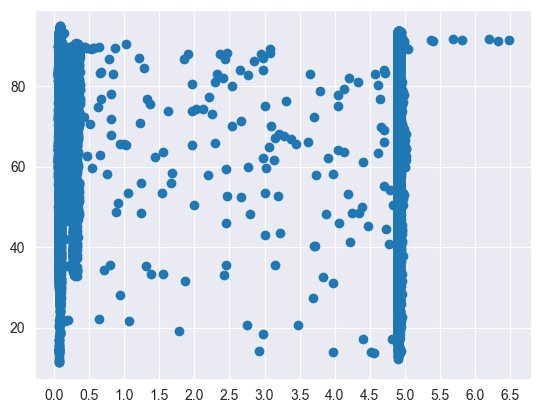

In [16]:
plt.xticks(ticks=np.arange(0, 7, .5))
plt.scatter(df.WindSpeed, df.Humidity)

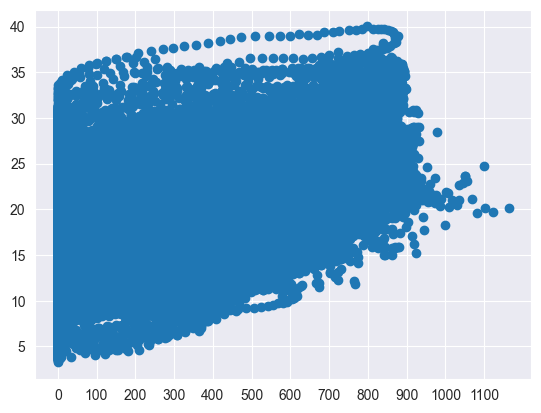

In [17]:
plt.xticks(ticks=np.arange(0, 1200, 100))
plt.scatter(df.generaldiffuseflows, df.Temperature)

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


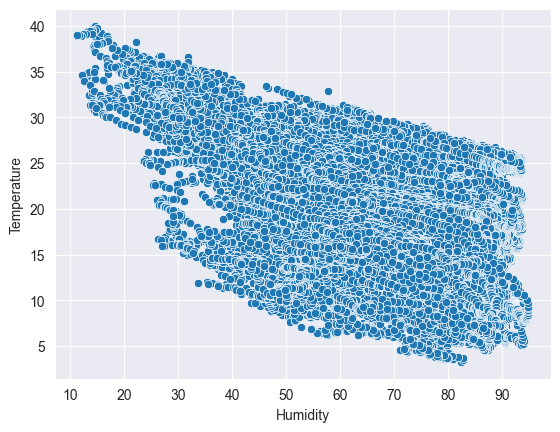

In [18]:
ax = plt.subplot()
sns.scatterplot(df.Humidity, df.Temperature)
ax.xaxis.set_major_locator(tck.MultipleLocator(10))

<AxesSubplot:xlabel='generaldiffuseflows', ylabel='diffuseflows'>

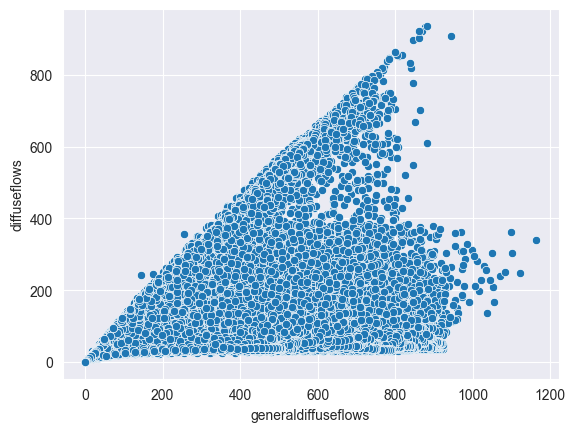

In [19]:
sns.scatterplot(x="generaldiffuseflows", y="diffuseflows", data=df)

<AxesSubplot:xlabel='Zone2PowerConsumption', ylabel='Zone1PowerConsumption'>

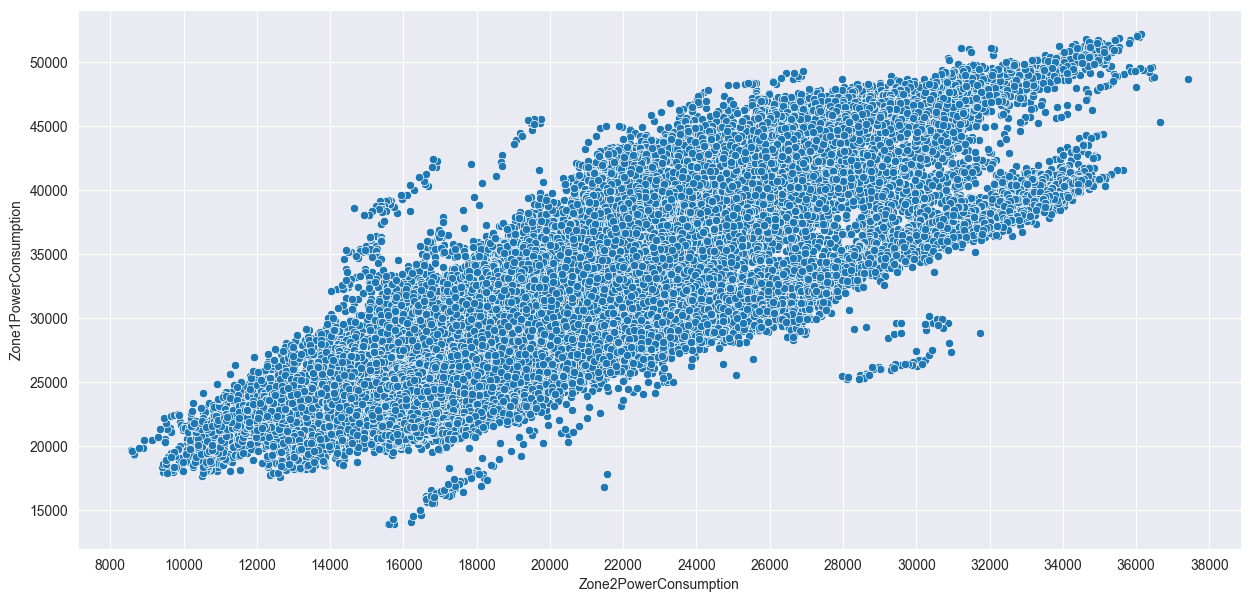

In [20]:
plt.figure(figsize=(15, 7))
plt.xticks(ticks=range(0, 40000, 2000))
sns.scatterplot(x="Zone2PowerConsumption", y="Zone1PowerConsumption", data=df)

<AxesSubplot:xlabel='Humidity', ylabel='Temperature'>

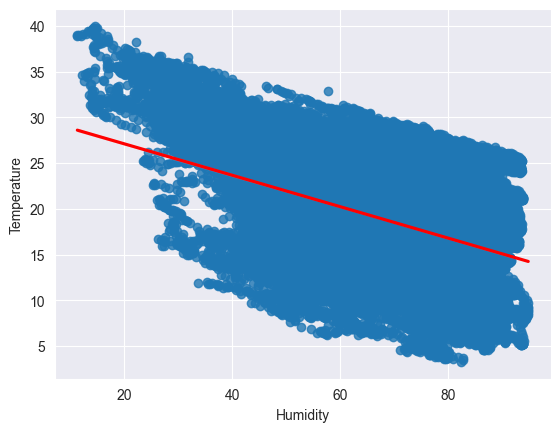

In [21]:
sns.regplot(x="Humidity", y="Temperature", data=df, line_kws={"color": "red"})

## Removing outliers

In [22]:
df = df.loc[(df.WindSpeed < 5.2) & (df.generaldiffuseflows < 1100) & (df.diffuseflows < 950)]
df

DateTime  Temperature  Humidity  WindSpeed  \
0         1/1/2017 0:00        6.559      73.8      0.083   
1         1/1/2017 0:10        6.414      74.5      0.083   
2         1/1/2017 0:20        6.313      74.5      0.080   
3         1/1/2017 0:30        6.121      75.0      0.083   
4         1/1/2017 0:40        5.921      75.7      0.081   
...                 ...          ...       ...        ...   
52411  12/30/2017 23:10        7.010      72.4      0.080   
52412  12/30/2017 23:20        6.947      72.6      0.082   
52413  12/30/2017 23:30        6.900      72.8      0.086   
52414  12/30/2017 23:40        6.758      73.0      0.080   
52415  12/30/2017 23:50        6.580      74.1      0.081   

       generaldiffuseflows  diffuseflows  Zone1PowerConsumption  \
0                    0.051         0.119            34055.69620   
1                    0.070         0.085            29814.68354   
2                    0.062         0.100            29128.10127   
3                    0.091         0.096            28228.86076   
4                    0.048         0.085            27335.69620   
...                    ...           ...                    ...   
52411                0.040         0.096            31160.45627   
52412                0.051         0.093            30430.41825   
52413                0.084         0.074            29590.87452   
52414                0.066         0.089            28958.17490   
52415                0.062         0.111            28349.80989   

       Zone2PowerConsumption  Zone3PowerConsumption  
0                16128.87538            20240.96386  
1                19375.07599            20131.08434  
2                19006.68693            19668.43373  
3                18361.09422            18899.27711  
4                17872.34043            18442.40964  
...                      ...                    ...  
52411            26857.31820            14780.31212  
52412            26124.57809            14428.81152  
52413            25277.69254            13806.48259  
52414            24692.23688            13512.60504  
52415            24055.23167            13345.49820  

[52406 rows x 9 columns]

## Select target variable

In [25]:
df.DateTime = pd.to_datetime(df.DateTime)
df

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


DateTime  Temperature  Humidity  WindSpeed  \
0     2017-01-01 00:00:00        6.559      73.8      0.083   
1     2017-01-01 00:10:00        6.414      74.5      0.083   
2     2017-01-01 00:20:00        6.313      74.5      0.080   
3     2017-01-01 00:30:00        6.121      75.0      0.083   
4     2017-01-01 00:40:00        5.921      75.7      0.081   
...                   ...          ...       ...        ...   
52411 2017-12-30 23:10:00        7.010      72.4      0.080   
52412 2017-12-30 23:20:00        6.947      72.6      0.082   
52413 2017-12-30 23:30:00        6.900      72.8      0.086   
52414 2017-12-30 23:40:00        6.758      73.0      0.080   
52415 2017-12-30 23:50:00        6.580      74.1      0.081   

       generaldiffuseflows  diffuseflows  Zone1PowerConsumption  \
0                    0.051         0.119            34055.69620   
1                    0.070         0.085            29814.68354   
2                    0.062         0.100            29128.10127   
3                    0.091         0.096            28228.86076   
4                    0.048         0.085            27335.69620   
...                    ...           ...                    ...   
52411                0.040         0.096            31160.45627   
52412                0.051         0.093            30430.41825   
52413                0.084         0.074            29590.87452   
52414                0.066         0.089            28958.17490   
52415                0.062         0.111            28349.80989   

       Zone2PowerConsumption  Zone3PowerConsumption  
0                16128.87538            20240.96386  
1                19375.07599            20131.08434  
2                19006.68693            19668.43373  
3                18361.09422            18899.27711  
4                17872.34043            18442.40964  
...                      ...                    ...  
52411            26857.31820            14780.31212  
52412            26124.57809            14428.81152  
52413            25277.69254            13806.48259  
52414            24692.23688            13512.60504  
52415            24055.23167            13345.49820  

[52406 rows x 9 columns]

In [37]:
df.set_index("DateTime")

Temperature  Humidity  WindSpeed  generaldiffuseflows  \
DateTime                                                                     
2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
2017-01-01 00:40:00        5.921      75.7      0.081                0.048   
...                          ...       ...        ...                  ...   
2017-12-30 23:10:00        7.010      72.4      0.080                0.040   
2017-12-30 23:20:00        6.947      72.6      0.082                0.051   
2017-12-30 23:30:00        6.900      72.8      0.086                0.084   
2017-12-30 23:40:00        6.758      73.0      0.080                0.066   
2017-12-30 23:50:00        6.580      74.1      0.081                0.062   

                     diffuseflows  Zone1PowerConsumption  \
DateTime                                                   
2017-01-01 00:00:00         0.119            34055.69620   
2017-01-01 00:10:00         0.085            29814.68354   
2017-01-01 00:20:00         0.100            29128.10127   
2017-01-01 00:30:00         0.096            28228.86076   
2017-01-01 00:40:00         0.085            27335.69620   
...                           ...                    ...   
2017-12-30 23:10:00         0.096            31160.45627   
2017-12-30 23:20:00         0.093            30430.41825   
2017-12-30 23:30:00         0.074            29590.87452   
2017-12-30 23:40:00         0.089            28958.17490   
2017-12-30 23:50:00         0.111            28349.80989   

                     Zone2PowerConsumption  Zone3PowerConsumption  
DateTime                                                           
2017-01-01 00:00:00            16128.87538            20240.96386  
2017-01-01 00:10:00            19375.07599            20131.08434  
2017-01-01 00:20:00            19006.68693            19668.43373  
2017-01-01 00:30:00            18361.09422            18899.27711  
2017-01-01 00:40:00            17872.34043            18442.40964  
...                                    ...                    ...  
2017-12-30 23:10:00            26857.31820            14780.31212  
2017-12-30 23:20:00            26124.57809            14428.81152  
2017-12-30 23:30:00            25277.69254            13806.48259  
2017-12-30 23:40:00            24692.23688            13512.60504  
2017-12-30 23:50:00            24055.23167            13345.49820  

[52406 rows x 8 columns]

In [38]:
df.dtypes

DateTime                 datetime64[ns]
Temperature                     float64
Humidity                        float64
WindSpeed                       float64
generaldiffuseflows             float64
diffuseflows                    float64
Zone1PowerConsumption           float64
Zone2PowerConsumption           float64
Zone3PowerConsumption           float64
dtype: object

In [47]:
df2 = df.copy()
df2["DayOfYear"] = df.DateTime.dt.dayofyear
df2["Hour"] = df.DateTime.dt.hour
df2["DayOfWeek"] = df.DateTime.dt.dayofweek
df2

DateTime  Temperature  Humidity  WindSpeed  \
0     2017-01-01 00:00:00        6.559      73.8      0.083   
1     2017-01-01 00:10:00        6.414      74.5      0.083   
2     2017-01-01 00:20:00        6.313      74.5      0.080   
3     2017-01-01 00:30:00        6.121      75.0      0.083   
4     2017-01-01 00:40:00        5.921      75.7      0.081   
...                   ...          ...       ...        ...   
52411 2017-12-30 23:10:00        7.010      72.4      0.080   
52412 2017-12-30 23:20:00        6.947      72.6      0.082   
52413 2017-12-30 23:30:00        6.900      72.8      0.086   
52414 2017-12-30 23:40:00        6.758      73.0      0.080   
52415 2017-12-30 23:50:00        6.580      74.1      0.081   

       generaldiffuseflows  diffuseflows  Zone1PowerConsumption  \
0                    0.051         0.119            34055.69620   
1                    0.070         0.085            29814.68354   
2                    0.062         0.100            29128.10127   
3                    0.091         0.096            28228.86076   
4                    0.048         0.085            27335.69620   
...                    ...           ...                    ...   
52411                0.040         0.096            31160.45627   
52412                0.051         0.093            30430.41825   
52413                0.084         0.074            29590.87452   
52414                0.066         0.089            28958.17490   
52415                0.062         0.111            28349.80989   

       Zone2PowerConsumption  Zone3PowerConsumption  DayOfYear  Hour  \
0                16128.87538            20240.96386          1     0   
1                19375.07599            20131.08434          1     0   
2                19006.68693            19668.43373          1     0   
3                18361.09422            18899.27711          1     0   
4                17872.34043            18442.40964          1     0   
...                      ...                    ...        ...   ...   
52411            26857.31820            14780.31212        364    23   
52412            26124.57809            14428.81152        364    23   
52413            25277.69254            13806.48259        364    23   
52414            24692.23688            13512.60504        364    23   
52415            24055.23167            13345.49820        364    23   

       DayOfWeek  
0              6  
1              6  
2              6  
3              6  
4              6  
...          ...  
52411          5  
52412          5  
52413          5  
52414          5  
52415          5  

[52406 rows x 12 columns]

# Selecting features from our dataset

In [51]:
x = df2.drop(["Zone1PowerConsumption", "Zone2PowerConsumption", "Zone3PowerConsumption", "DateTime"], axis=1).copy()
y = df2.Zone1PowerConsumption.copy()
display(x)
display(y)

Temperature  Humidity  WindSpeed  generaldiffuseflows  diffuseflows  \
0            6.559      73.8      0.083                0.051         0.119   
1            6.414      74.5      0.083                0.070         0.085   
2            6.313      74.5      0.080                0.062         0.100   
3            6.121      75.0      0.083                0.091         0.096   
4            5.921      75.7      0.081                0.048         0.085   
...            ...       ...        ...                  ...           ...   
52411        7.010      72.4      0.080                0.040         0.096   
52412        6.947      72.6      0.082                0.051         0.093   
52413        6.900      72.8      0.086                0.084         0.074   
52414        6.758      73.0      0.080                0.066         0.089   
52415        6.580      74.1      0.081                0.062         0.111   

       DayOfYear  Hour  DayOfWeek  
0              1     0          6  
1              1     0          6  
2              1     0          6  
3              1     0          6  
4              1     0          6  
...          ...   ...        ...  
52411        364    23          5  
52412        364    23          5  
52413        364    23          5  
52414        364    23          5  
52415        364    23          5  

[52406 rows x 8 columns]

0        34055.69620
1        29814.68354
2        29128.10127
3        28228.86076
4        27335.69620
            ...     
52411    31160.45627
52412    30430.41825
52413    29590.87452
52414    28958.17490
52415    28349.80989
Name: Zone1PowerConsumption, Length: 52406, dtype: float64

# Split into training and testing data

In [28]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
display(x_train)
display(x_test)
display(y_train)
display(y_test)

Temperature  Humidity  WindSpeed  generaldiffuseflows  diffuseflows  \
9666         12.34     85.30      0.076                0.055         0.163   
1977         18.10     62.42      0.089               73.800        83.300   
34542        25.79     80.40      4.917                0.066         0.144   
14446        15.12     79.30      0.075               57.310        53.440   
5940         11.94     77.10      4.919                0.033         0.148   
...            ...       ...        ...                  ...           ...   
11284        10.48     89.90      0.082               42.590        39.970   
44742        21.73     63.61      0.074              215.800       151.900   
38161        23.01     46.58      4.921                0.102         0.096   
860          12.37     76.40      0.085                0.055         0.119   
15795        16.44     84.60      0.072               52.850        44.550   

       DayOfYear  Hour  DayOfWeek  
9666          68     3          3  
1977          14    17          5  
34542        240    21          0  
14446        101     7          1  
5940          42     6          5  
...          ...   ...        ...  
11284         79     8          0  
44742        311    17          1  
38161        266     0          5  
860            6    23          4  
15795        110    16          3  

[41924 rows x 8 columns]

Temperature  Humidity  WindSpeed  generaldiffuseflows  diffuseflows  \
45881        23.77     46.56      0.085              397.500       115.000   
51262        12.80     74.30      0.073                0.033         0.185   
37172        20.55     79.70      0.282                0.088         0.152   
25752        25.42     64.11      4.915               52.310        52.040   
26897        29.14     59.73      4.923              183.900       222.300   
...            ...       ...        ...                  ...           ...   
11354        14.02     71.20      0.081                0.081         0.119   
16377        21.28     51.42      0.088              214.100       182.200   
47521        12.01     81.80      0.080                0.044         0.122   
11026        12.00     84.80      0.082               66.170        59.790   
42228        16.21     86.70      4.917                0.055         0.107   

       DayOfYear  Hour  DayOfWeek  
45881        319    14          2  
51262        356    23          4  
37172        259     3          5  
25752        179    20          2  
26897        187    18          3  
...          ...   ...        ...  
11354         79    20          0  
16377        114    17          0  
47521        331     0          0  
11026         77    13          5  
42228        294     6          5  

[10482 rows x 8 columns]

9666     23272.85106
1977     35775.18987
34542    47742.15316
14446    25129.47255
5940     24077.28814
            ...     
11284    26079.31915
44742    31470.76923
38161    31132.03540
860      32002.02532
15795    25520.08611
Name: Zone1PowerConsumption, Length: 41924, dtype: float64

45881    33680.00000
51262    28946.00760
37172    26206.72566
25752    42309.93377
26897    36499.13621
            ...     
11354    44793.19149
16377    33400.55974
47521    26486.15385
11026    35270.80851
42228    25352.82276
Name: Zone1PowerConsumption, Length: 10482, dtype: float64

# Model building

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()
model

LinearRegression()

In [54]:
model.fit(x_train, y_train)

LinearRegression()

In [55]:
model.coef_

array([ 4.44111674e+02,  5.81164260e+00,  6.23403700e+01, -4.76062475e-01,
       -4.64558899e+00, -8.12033876e+00,  6.92380791e+02, -2.31683729e+02])

In [56]:
model.intercept_

18115.76270449877

In [58]:
model.score(x, y)

0.643718054144111

In [59]:
y_pred = model.predict(x_test)
y_pred

array([34864.28418066, 36343.05554976, 26537.83346479, ...,
       21241.50366149, 30851.04672357, 26733.17319109])

In [60]:
pd.DataFrame({"Actual values": y_test, "Predicted values": y_pred})

Actual values  Predicted values
45881    33680.00000      34864.284181
51262    28946.00760      36343.055550
37172    26206.72566      26537.833465
25752    42309.93377      41748.117218
26897    36499.13621      40840.245309
...              ...               ...
11354    44793.19149      37966.564562
16377    33400.55974      37767.183272
47521    26486.15385      21241.503661
11026    35270.80851      30851.046724
42228    25352.82276      26733.173191

[10482 rows x 2 columns]

### Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
tree_model = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_model

DecisionTreeRegressor(max_depth=6, random_state=42)

In [74]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [75]:
tree_model.score(x, y)

0.896018190064794

In [79]:
y_pred_tree = tree_model.predict(x_test)
y_pred_tree

array([31524.49859686, 29482.79992016, 25718.73746498, ...,
       25476.94539931, 33946.69360493, 25189.68859885])

In [80]:
pd.DataFrame({"Actual values": y_test, "Predicted values": y_pred_tree})

Actual values  Predicted values
45881    33680.00000      31524.498597
51262    28946.00760      29482.799920
37172    26206.72566      25718.737465
25752    42309.93377      44994.613863
26897    36499.13621      38536.887859
...              ...               ...
11354    44793.19149      41420.992375
16377    33400.55974      33946.693605
47521    26486.15385      25476.945399
11026    35270.80851      33946.693605
42228    25352.82276      25189.688599

[10482 rows x 2 columns]

### Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
forest = RandomForestRegressor(max_depth=6, random_state=42)
forest

RandomForestRegressor(max_depth=6, random_state=42)

In [87]:
forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, random_state=42)

In [88]:
forest.score(x, y)

0.9037059867462021

In [89]:
y_pred_forest = forest.predict(x_test)
y_pred_forest

array([31346.00092461, 29411.95240243, 25998.3614542 , ...,
       25635.68262406, 33850.0296235 , 24751.53349164])

In [90]:
pd.DataFrame({"Actual values": y_test, "Predicted values": y_pred_forest})

Actual values  Predicted values
45881    33680.00000      31346.000925
51262    28946.00760      29411.952402
37172    26206.72566      25998.361454
25752    42309.93377      44960.634854
26897    36499.13621      38385.991622
...              ...               ...
11354    44793.19149      41392.610626
16377    33400.55974      33850.029624
47521    26486.15385      25635.682624
11026    35270.80851      33850.029624
42228    25352.82276      24751.533492

[10482 rows x 2 columns]

### k-Nearest Neighbours Regressor

In [91]:
from sklearn.neighbors import KNeighborsRegressor

In [92]:
knn = KNeighborsRegressor()
knn

KNeighborsRegressor()

In [94]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [95]:
knn.score(x, y)

0.9420429277508608

In [96]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([31505.956128, 31268.745246, 25070.017698, ..., 25385.846154,
       30314.757446, 23793.715538])

In [97]:
pd.DataFrame({"Actual values": y_test, "Predicted values": y_pred_knn})

Actual values  Predicted values
45881    33680.00000      31505.956128
51262    28946.00760      31268.745246
37172    26206.72566      25070.017698
25752    42309.93377      43311.526522
26897    36499.13621      35255.535850
...              ...               ...
11354    44793.19149      44067.676596
16377    33400.55974      32524.093244
47521    26486.15385      25385.846154
11026    35270.80851      30314.757446
42228    25352.82276      23793.715538

[10482 rows x 2 columns]

Look for Performance evaluation metrics then run these after each model.